<a href="https://colab.research.google.com/github/neonithinar/GTRSB/blob/main/GTRSB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GTSRB for oburcullum


In [1]:
! pip install split-folders

In [2]:
import os
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pathlib
import cv2
import splitfolders


In [3]:
! wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip" -O temp.zip
! unzip temp.zip
! rm temp.zip

# dataset_url = "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Training_Images.zip"
# data_dir = tf.keras.utils.get_file('GTRSB', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

Streaming output truncated to the last 5000 lines.
  inflating: GTSRB/Final_Training/Images/00035/00000_00019.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00020.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00021.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00022.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00023.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00024.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00025.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00026.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00027.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00028.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00000_00029.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00000.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00001.ppm  
  inflating: GTSRB/Final_Training/Images/00035/00001_00002.ppm  
  inflating: GTSRB/Final_Training/Image

In [4]:
data_dir = os.path.join("/content/GTSRB/Final_Training/Images")
img_width = 48
img_height = 48
ext = [".ppm"]
batch_size = 32

In [5]:
# complete_ds = keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Seems like keras doesnot like the naming format for the filenames or folder names. so let's first replace the subfolder names with the actual class names of the traffic signals


In [6]:
name_dict = {"00000":"00000_speed_limit_20kmph",
             "00001":"00001_speed_limit_30_kmph",
             "00002":"00002_speed_limit_50_kmph",
             "00003":"00003_speed_limit_60_kmph",
             "00004":"00004_speed_limit_70_kmph",
             "00005":"00005_speed_limit_80_kmph",
             "00006":"00006_end_of_speed_limit", 
             "00007":"00007_speed_limit_100_kmph",
             "00008":"00008_speed_limit_120_kmph",
             "00009":"00009_no_passing", 
             "00010":"00010_no_passing_for_vehicles",
             "00011":"00011_right_of_way_at_the",
             "00012":"00012_priority_road",
             "00013":"00013_yeild",
             "00014":"00014_stop",
             "00015":"00015_no_vehicles",
             "00016":"00016_vehicles_over_34_metres",
             "00017":"00017_no_entry",
             "00018":"00018_general_caution",
             "00019":"00019_dangerous_curve_to_left",
             "00020":"00020_dangerous_curve_to_right",
             "00021":"00021_double_curve",
             "00022":"00022_bumpy_road",
             "00023":"00023_slippery_road",
             "00024":"00024_roads_narrows_on_the_right",
             "00025":"00025_road_work",
             "00026":"00026_traffic_signals",
             "00027":"00027_pedestrians",
             "00028":"00028_children_crossing",
             "00029":"00029_bicycle_crossing",
             "00030":"00030_beware_of_ice_or_snow",
             "00031":"00031_wild_animals_crossing",
             "00032":"00032_end_of_all_speed_and_passing",
             "00033":"00033_turn_right_ahead",
             "00034":"00034_turn_left_ahead",
             "00035":"00035_ahead_only",
             "00036":"00036_go_straight_or_right",
             "00037":"00037_go_straight_or_left",
             "00038":"00038_keep_right",
             "00039":"00039_keep_left",
             "00040":"00040_roundabout_mandatory",
             "00041":"00041_end_of_passing",
             "00042":"00042_end_of_no_passing_by"}

In [7]:
name_dict["00042"]

'00042_end_of_no_passing_by'

In [8]:
#Renaming the directories with class names

for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs: 
    # print(root +"/"+ name)
    # print(name_dict[str(name)])
    rename_dir = root +"/"+ dir_name
    final_name = root +"/" + name_dict[str(dir_name)]
    os.rename(rename_dir, final_name)

In [9]:
# renaming the files
for root, dirs, files in os.walk(data_dir, topdown= False):
  dirs = sorted(dirs)
  for dir_name in dirs:
    for dir_root, _, sub_dir_files in os.walk(os.path.join(root + "/" + dir_name)):
      sub_dir_files = sorted(sub_dir_files)
      for filename in sub_dir_files:
        rename_file = dir_root+ "/" + filename
        new_name = dir_root+ "/" + "prefix_" +filename        
        _, ext = os.path.splitext(filename)
        if ext == ".ppm":
          os.rename(rename_file, new_name)
          i = cv2.imread(new_name)
          cv2.imwrite((new_name.strip(".ppm") + ".jpg"),i)
        else:
          os.remove(rename_file)
      
      

In [10]:
# create train, test and validation dirs with split folders
os.makedirs('GTRSB_final')
os.makedirs('GTRSB_final/train')
os.makedirs('GTRSB_final/test')
os.makedirs('GTRSB_final/val')

In [11]:
# split the data in GTRSB/Final_Training/Images into the above folders
output_folder = "/content/GTRSB_final"
# input folder is data_dir
splitfolders.ratio(data_dir, output= output_folder, seed = 42, ratio=(0.8, 0.1, 0.1))

Copying files: 78418 files [00:14, 5312.62 files/s]


In [12]:
train_dir = os.path.join('/content/GTRSB_final/train')
test_dir = os.path.join('/content/GTRSB_final/test')
val_dir = os.path.join('/content/GTRSB_final/val')

In [13]:
train_ds = keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)



Found 31339 files belonging to 43 classes.


In [14]:
val_ds = keras.preprocessing.image_dataset_from_directory(
  val_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3921 files belonging to 43 classes.


In [15]:
test_dir = keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=42, 
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3949 files belonging to 43 classes.


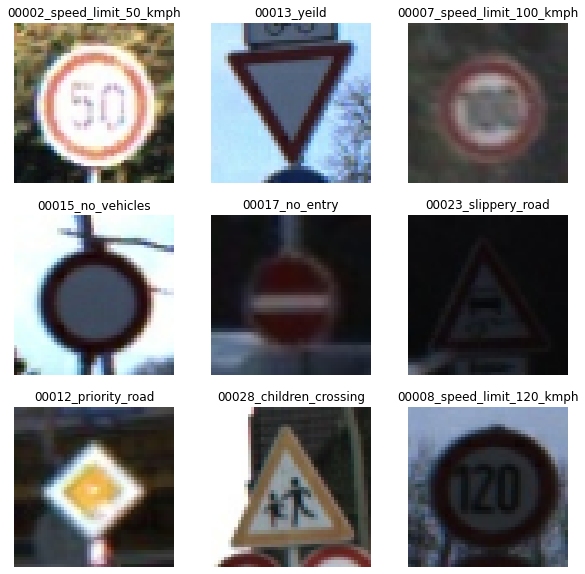

In [16]:
class_names = train_ds.class_names
plt.figure(figsize= (10, 10))
for images, label in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[label[i]])
    plt.axis("off")

In [17]:
# def image_preprocess(image):
#   image = tf.image.resize(image, [48, 48])
# normalization_layer = keras.layers.experimental.preprocessing.Rescaling(1./ 255)
AUTOTUNE = tf.data.AUTOTUNE


In [18]:
def preprocess_dataset(ds):
  # ds = tf.data.Dataset.list_files(ds)
  # ds = ds.interleave(ds, num_parallel_calls = AUTOTUNE)
  ds = ds.cache()
  ds = ds.prefetch(buffer_size = AUTOTUNE)
  return ds

  # normalized_ds = ds.map(lambda x, y : (normalization_layer(x), y))



  

In [19]:
train_ds = preprocess_dataset(train_ds)

In [20]:
val_ds = preprocess_dataset(val_ds)

# Create the model

In [21]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

model = keras.models.Sequential([
                                 keras.layers.experimental.preprocessing.Rescaling(1./255), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(32, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Dropout(0.2), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), 
                                                     padding= 'same', activation= 'relu'), 
                                 keras.layers.Conv2D(64, kernel_size= (3, 3), padding= 'same', 
                                                     activation= 'relu'), 
                                 keras.layers.MaxPooling2D(pool_size= (2, 2)), 
                                 keras.layers.Dropout(0.2),
                                 keras.layers.Flatten(), 
                                 keras.layers.Dense(128, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(58, activation= 'relu'), 
                                 keras.layers.Dropout(0.5), 
                                 keras.layers.Dense(43, activation = 'softmax')
])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
model.compile(loss= 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [22]:
history = model.fit(train_ds, validation_data = val_ds,callbacks= [early_stopping_cb], epochs = 50)


Epoch 1/50
980/980 [==============================] - 51s 21ms/step - loss: 3.1200 - accuracy: 0.1580 - val_loss: 1.5236 - val_accuracy: 0.4652
Epoch 2/50
980/980 [==============================] - 16s 16ms/step - loss: 1.7089 - accuracy: 0.4295 - val_loss: 0.8708 - val_accuracy: 0.7373
Epoch 3/50
980/980 [==============================] - 16s 16ms/step - loss: 1.1881 - accuracy: 0.5843 - val_loss: 0.6237 - val_accuracy: 0.8110
Epoch 4/50
980/980 [==============================] - 15s 16ms/step - loss: 0.9560 - accuracy: 0.6656 - val_loss: 0.5082 - val_accuracy: 0.8939
Epoch 5/50
980/980 [==============================] - 15s 16ms/step - loss: 0.8262 - accuracy: 0.7163 - val_loss: 0.3267 - val_accuracy: 0.9260
Epoch 6/50
980/980 [==============================] - 16s 16ms/step - loss: 0.7104 - accuracy: 0.7588 - val_loss: 0.2785 - val_accuracy: 0.9383
Epoch 7/50
980/980 [==============================] - 16s 16ms/step - loss: 0.6441 - accuracy: 0.7819 - val_loss: 0.2238 - val_accuracy:

In [ ]:
# official test dir

# ! cd /content/test
# ! wget "https://sid.erda.dk/public/archives/daaeac0d7ce1152aea9b61d9f1e19370/GTSRB_Final_Test_Images.zip" -O temp.zip
# ! unzip temp.zip
# ! rm temp.zip

True


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 48, 48, 3)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 64)        3

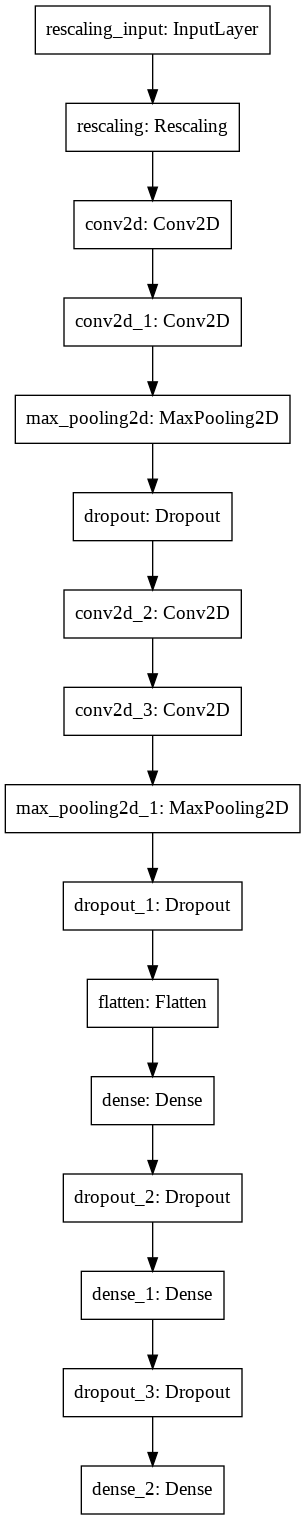

In [23]:
keras.utils.plot_model(model)